Kaggle Notebook used as a reference - https://www.kaggle.com/code/dtosidis/flower-classifier-tensorflow

Problem statement

The Oxford Flowers 102 dataset consists of 102 categories of flowers, with each category containing between 40 and 258 images. The dataset is used for image classification tasks where the goal is to correctly classify images of flowers into their respective categories.

The problem statement for this dataset can be defined as follows: given an image of a flower, classify it into one of the 102 categories of flowers. This is a typical image classification problem that is encountered in many real-world applications such as content-based image retrieval systems, plant identification, and many others.

In order to solve this problem, we have used transfer learning and fine-tuning techniques. Transfer learning allows us to leverage the knowledge and weights learned by a pre-trained model, such as MobileNetV2, to solve our classification task. Fine-tuning refers to the process of adapting the pre-trained model to our specific task by training the top layers of the network on our dataset while keeping the lower layers fixed. This allows the network to learn specific features related to our dataset, improving its performance on our task.

####The model is trained with a pre-trained MobileNetV2 model  which is used as a base and then fine-tuned on the dataset. Fine-tuning a pre-trained model is a common technique in deep learning, which allows the model to leverage the pre-existing knowledge from the pre-trained model while adapting it to the specific task. This approach often leads to faster convergence and higher accuracy compared to training a model from scratch on a small dataset.


This code imports necessary libraries including TensorFlow, NumPy, os, and Matplotlib to build an image classification model using the MobileNetV2 architecture. It also imports the ImageDataGenerator and TensorFlow Datasets (tfds) libraries for data preprocessing and management. The MobileNetV2 architecture is used as the base model, with a global average pooling layer and a dense layer added on top for classification.

In [2]:
pip install tensorflow-datasets

  Using cached tensorflow_datasets-4.8.3-py3-none-any.whl (5.4 MB)
  Using cached etils-1.1.1-py3-none-any.whl (115 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-win_amd64.whl (101 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached tensorflow_metadata-1.12.0-py3-none-any.whl (52 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached zipp-3.15.0-py3-none-any.whl (6.8 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached googleapis_common_protos-1.59.0-py2.py3-none-any.whl (223 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pylab as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This code snippet imports the TensorFlow library and prints the version of the installed TensorFlow package. It can be useful for verifying the installed version of TensorFlow before running other code that may depend on a specific version.

In [4]:
import tensorflow as tf
print(tf.__version__)

2.11.0


This code loads the oxford_flowers102 dataset using TensorFlow Datasets (tfds) and splits it into three datasets: training, testing, and validation. The with_info=True argument returns additional information about the dataset, such as the number of classes and the shape of the images. The as_supervised=True argument loads the dataset in a tuple structure, with the first element being the image and the second element being the corresponding label.

In [5]:
# Load the dataset

dataset, info = tfds.load(name='oxford_flowers102', with_info=True, as_supervised=True, split=['train', 'test', 'validation'])
train_dataset, test_dataset, val_dataset = dataset

This code loads the "oxford_flowers102" dataset from TensorFlow Datasets and splits it into a training set ("train_dataset"), a test set ("test_dataset"), and a validation set ("val_dataset").

The second code loads the "oxford_flowers102" dataset from TensorFlow Datasets and splits it into a test set ("train") and obtains information about the dataset ("info_train"). Then, it displays a few examples of the dataset using the tfds.show_examples function.

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


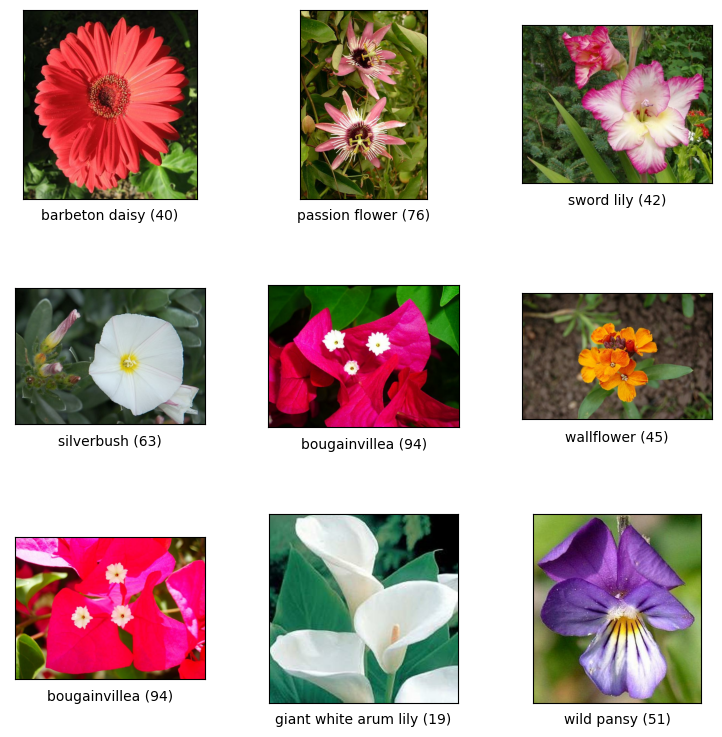

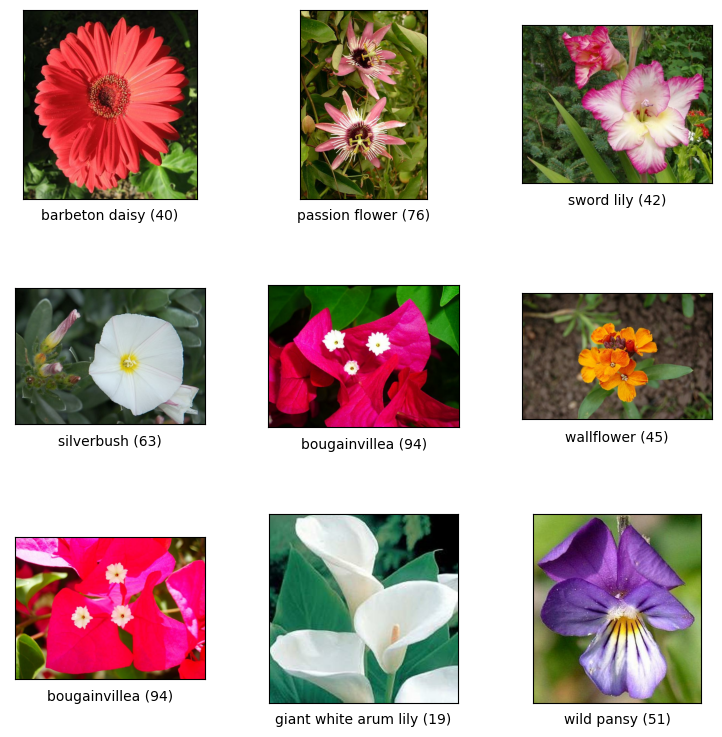

In [6]:
train, info_train = tfds.load(name='oxford_flowers102', with_info=True, split='test')
tfds.show_examples (info_train, train)

In [7]:
info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102


This line of code returns the number of samples in the first split of the dataset variable, which was loaded using TensorFlow Datasets. Specifically, it returns the length of the list that contains the images and corresponding labels of the first split.



In [8]:
len (list (dataset[0]))

1020

This code sets the image dimensions to 224x224 pixels and batch size to 32 for the image classification model. It also sets the number of classes based on the information extracted from the dataset.

In [9]:
# Set image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Set number of classes
num_classes = info.features['label'].num_classes


This code calculates the number of images in the train, test, and validation splits of the Oxford Flowers 102 dataset. It uses the info variable which was obtained by loading the dataset using tfds.load(). The number of examples in each split is accessed using the num_examples attribute of the tf.data.Dataset object. The counts are stored in the train_count, test_count, and val_count variables respectively.

In [10]:
# Calculate the number of images in the train, test, and validation splits
train_count = info.splits['train'].num_examples
test_count = info.splits['test'].num_examples
val_count = info.splits['validation'].num_examples

This code calculates the distribution of classes in the training dataset. It creates an empty dictionary class_dist, and then loops through each image and label in the train_dataset. For each image and label, it gets the class name using the int2str method from the dataset info, and then checks if the class name already exists in class_dist. If it does, it increments the count for that class by 1. If it doesn't, it adds the class name to class_dist and sets its count to 1. At the end of the loop, class_dist contains the number of images for each class in the training dataset.

In [11]:
class_dist = {}

# Loop through each class and count the number of samples
for img, label in train_dataset:
    class_name = info.features['label'].int2str(label.numpy())
    if class_name in class_dist:
        class_dist[class_name] += 1
    else:
        class_dist[class_name] = 1


##EDA

1. Class Distribution

This code creates a dictionary to store the distribution of samples across the different classes in the training dataset of the Oxford Flowers 102 dataset. It loops through each image in the dataset and counts the number of samples for each class. Then, it plots a bar chart of the class distribution using Matplotlib, with the class labels on the x-axis and the number of samples on the y-axis. This visualization helps to understand the distribution of samples across the different classes, which is important for training and evaluating a machine learning model on this dataset.

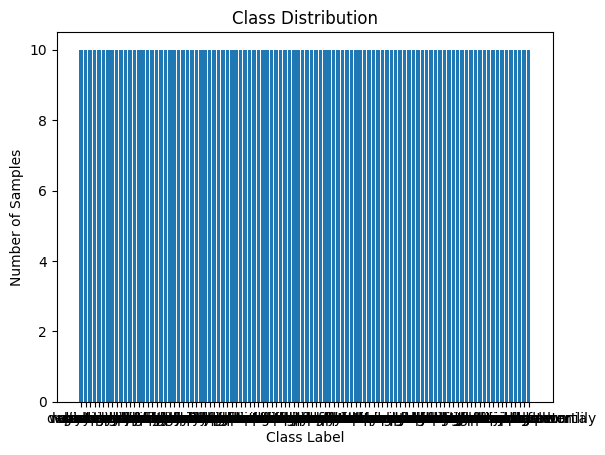

In [12]:
# Create a dictionary to store the distribution of samples across the different classes
class_dist = {}

# Loop through each class and count the number of samples
for img, label in train_dataset:
    class_name = info.features['label'].int2str(label.numpy())
    if class_name in class_dist:
        class_dist[class_name] += 1
    else:
        class_dist[class_name] = 1

# Plot a bar chart of the class distribution
plt.bar(class_dist.keys(), class_dist.values())
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.show()

2. Image Size Distribution

This code creates two lists to store the widths and heights of images in the train dataset, then loops through each image in the train set and records its size. After that, it plots histograms of the image widths and heights. The first histogram shows the distribution of image widths in pixels, while the second histogram shows the distribution of image heights in pixels. The histograms are plotted using matplotlib.

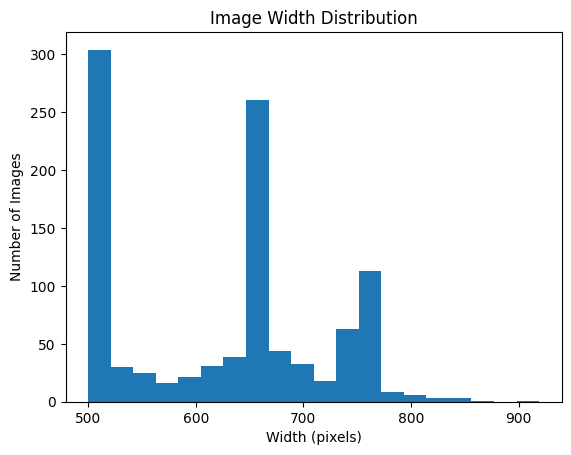

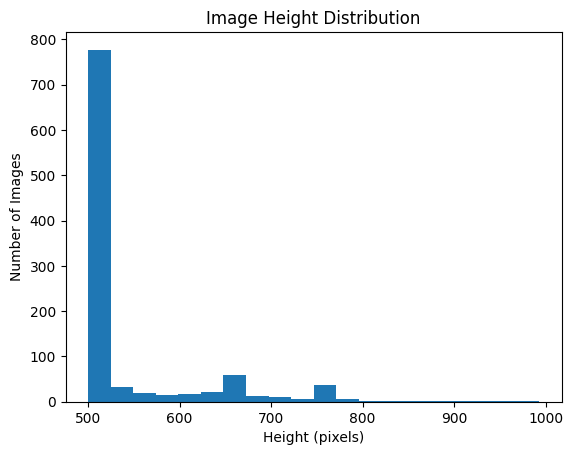

In [13]:
# Create lists to store the image widths and heights
widths = []
heights = []

# Loop through each image in the train set and record its size
for img, label in train_dataset:
    widths.append(img.shape[1])
    heights.append(img.shape[0])

# Plot histograms of the image widths and heights
plt.hist(widths, bins=20)
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Number of Images')
plt.show()

plt.hist(heights, bins=20)
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Number of Images')
plt.show()

In [14]:
train_dataset = train_dataset.map(lambda img, label: (tf.image.resize(img, [224, 224]), label))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
image_batch, label_batch = next(iter(train_dataset.batch(batch_size)))

3. Pixel Intensity Distribution

This code extracts a random batch of images from the train set, reshapes the images to 1D arrays and normalizes the pixel values. Then, it plots histograms of the pixel intensities for each color channel (red, green, and blue). The histograms show the distribution of pixel values for each color channel, with the x-axis representing the pixel value and the y-axis representing the number of pixels with that value. The bins parameter specifies the number of bins to use in the histogram. The resulting plot gives insight into the distribution of pixel intensities in the dataset.

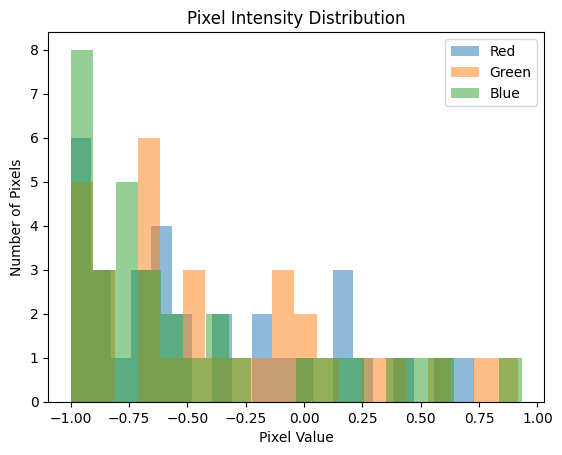

In [16]:
# Extract a random batch of images from the train set
image_batch, label_batch = next(iter(train_dataset.batch(batch_size)))

# Reshape the images to 1D arrays and normalize the pixel values
image_batch = tf.reshape(image_batch, [batch_size, -1])
image_batch = preprocess_input(image_batch)

# Plot histograms of the pixel intensities for each color channel
plt.hist(image_batch[:, 0], bins=20, alpha=0.5, label='Red')
plt.hist(image_batch[:, 1], bins=20, alpha=0.5, label='Green')
plt.hist(image_batch[:, 2], bins=20, alpha=0.5, label='Blue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')
plt.legend()
plt.show()

This code creates a dictionary label_count to store the count of images for each label in the train dataset. It loops through each image and label in the train_dataset, and if the label is not already in the label_count dictionary, it adds it and sets its count to 1. If the label is already in the dictionary, it increments the count by 1.

In [17]:
# Get label distribution in the train dataset
label_count = {}
for image, label in train_dataset:
    if label.numpy() not in label_count:
        label_count[label.numpy()] = 1
    else:
        label_count[label.numpy()] += 1

This code creates a bar graph to show the label distribution in the train dataset. It first counts the number of samples for each label in the train dataset and stores the count in a dictionary called label_count. Then, it uses plt.bar() and plt.xticks() functions to create a bar graph with the x-axis representing the label values and the y-axis representing the corresponding count of samples for each label. The plt.xlabel(), plt.ylabel(), and plt.title() functions are used to set the x-axis label, y-axis label, and graph title, respectively. Finally, plt.show() is used to display the graph.

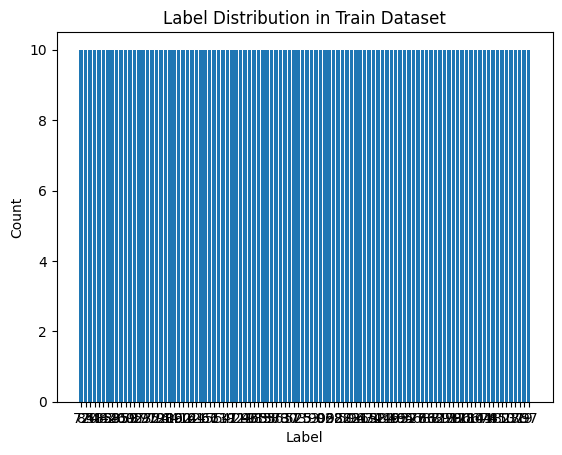

In [18]:
# Create a bar graph to show label distribution
plt.bar(range(len(label_count)), list(label_count.values()))
plt.xticks(range(len(label_count)), list(label_count.keys()))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution in Train Dataset')
plt.show()


This code is used to count the distribution of image sizes in the train dataset.

In [19]:
# Get image size distribution in the train dataset
size_count = {}
for image, label in train_dataset:
    size = image.numpy().shape
    if size not in size_count:
        size_count[size] = 1
    else:
        size_count[size] += 1

This code creates a bar graph to show the distribution of image sizes in the train dataset. It first creates a dictionary size_count to count the number of occurrences of each image size. Then it plots a bar graph with the x-axis representing the image sizes, the y-axis representing the count of images with that size, and the bars showing the count for each size. The x-axis labels are rotated 90 degrees for readability.

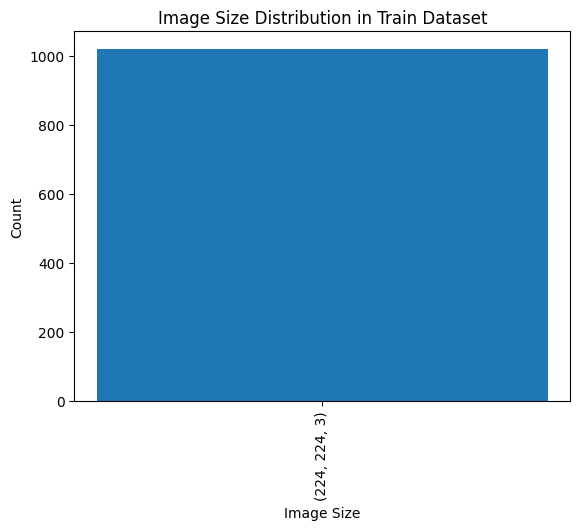

In [20]:
# Create a bar graph to show image size distribution
plt.bar(range(len(size_count)), list(size_count.values()))
plt.xticks(range(len(size_count)), [str(size) for size in size_count.keys()], rotation=90)
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.title('Image Size Distribution in Train Dataset')
plt.show()


The code sets up data augmentation and preprocessing using the ImageDataGenerator class from Keras. The preprocessing_function argument specifies a function to apply to each image before any other transformations are applied. The other arguments specify various transformations to apply to the images during training, such as rotation, zooming, shearing, and horizontal flipping. These transformations help to increase the diversity of the training data and improve the robustness of the model.

In [21]:
# Set up data augmentation and preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

This code sets up a ImageDataGenerator for the test set, which will apply the preprocess_input function to each image in the test set. The preprocess_input function is a pre-defined function in the tf.keras.applications module that performs some standard pre-processing steps on the input image, such as scaling the pixel values to be between -1 and 1.

In [22]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)


This code creates generators for the train, validation, and test sets of image data.

Each generator applies the following transformations to the images:

1. Resizes the images to the specified img_width and img_height using tf.image.resize().
2. Applies the preprocess_input() function to normalize the pixel values.
3. Batches the images into batches of size batch_size.

For the train_generator, the images are also shuffled using a buffer size of 1000 before being batched. This allows for randomization of the order in which the images are presented during training, which can help prevent the model from overfitting to the order of the images in the dataset.

In [23]:
# Create generators for train, validation, and test sets
train_generator = train_dataset.map(lambda x, y: (preprocess_input(tf.image.resize(x, (img_width, img_height))), y)).shuffle(1000).batch(batch_size)
val_generator = val_dataset.map(lambda x, y: (preprocess_input(tf.image.resize(x, (img_width, img_height))), y)).batch(batch_size)
test_generator = test_dataset.map(lambda x, y: (preprocess_input(tf.image.resize(x, (img_width, img_height))), y)).batch(batch_size)


This code loads the MobileNetV2 model architecture pre-trained on the ImageNet dataset, but excludes the fully connected top layers that are used for classification. The input shape is set to (img_width, img_height, 3) which is the size and number of color channels for the images in our dataset.

In [24]:
# Load MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

9406464/9406464 [==============================] - 0s 0us/step


This code freezes the weights of all layers in the base_model so that they are not trainable during the training process.

In [25]:
# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

### Fine-tuning MobileNetV2
This code adds custom top layers to the MobileNetV2 model. The output of the base model is passed through a global average pooling layer, followed by a fully connected dense layer with 1024 units and ReLU activation. Finally, the output is passed through another dense layer with a number of units equal to the number of classes in the dataset, and sigmoid activation function is applied to get the probability distribution of the classes.

In [26]:
# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='sigmoid')(x)


This code calculates the number of steps required per epoch and validation step in the training process. tf.data.experimental.cardinality(train_dataset).numpy() returns the total number of samples in the training dataset, which is then divided by the batch size to determine the number of steps required to complete one epoch. The // operator is used to perform integer division, discarding any remainder. Similarly, the validation steps are calculated for the validation dataset. These values are typically used in the training process to ensure that each sample is seen once per epoch and that the validation accuracy is computed at regular intervals.

In [27]:
# calculating the number of steps per epoch and validation steps:

steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy() // batch_size
validation_steps = tf.data.experimental.cardinality(val_dataset).numpy() // batch_size


The code compiles the model with the specified optimizer, loss function, and evaluation metric. The model is defined as taking the base model's input and outputting the custom top layers' predictions. The optimizer used is Adam, the loss function is sparse categorical cross-entropy, and the evaluation metric is accuracy.

In [28]:
# Compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


This code trains the compiled model using the fit() method with the following parameters:

> train_generator: a generator that provides batches of preprocessed training images and their corresponding labels
> steps_per_epoch: the number of steps to be performed in each epoch before declaring an epoch finished
> epochs: the number of times the entire training dataset is passed through the network
> validation_data: a generator that provides batches of preprocessed validation images and their corresponding labels
> validation_steps: the number of steps to be performed in each epoch during validation

The training progress is stored in the history object, which contains the values of the loss and accuracy metrics for the training and validation sets at each epoch.

In [29]:
# # Train the model

history = model.fit(
    train_generator,
    steps_per_epoch=tf.data.experimental.cardinality(train_generator).numpy(),
    epochs=10,
    validation_data=val_generator,
    validation_steps=tf.data.experimental.cardinality(val_generator).numpy()
)

Epoch 1/10
32/32 [==============================] - 30s 887ms/step - loss: 3.5884 - accuracy: 0.2520 - val_loss: 1.9765 - val_accuracy: 0.5814
Epoch 2/10
32/32 [==============================] - 27s 828ms/step - loss: 0.8686 - accuracy: 0.8098 - val_loss: 1.1380 - val_accuracy: 0.7196
Epoch 3/10
32/32 [==============================] - 27s 828ms/step - loss: 0.2659 - accuracy: 0.9598 - val_loss: 0.9278 - val_accuracy: 0.7667
Epoch 4/10
32/32 [==============================] - 27s 828ms/step - loss: 0.0937 - accuracy: 0.9971 - val_loss: 0.8043 - val_accuracy: 0.7824
Epoch 5/10
32/32 [==============================] - 26s 824ms/step - loss: 0.0465 - accuracy: 0.9961 - val_loss: 0.7785 - val_accuracy: 0.7951
Epoch 6/10
32/32 [==============================] - 26s 824ms/step - loss: 0.0303 - accuracy: 0.9971 - val_loss: 0.7275 - val_accuracy: 0.8078
Epoch 7/10
32/32 [==============================] - 28s 875ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.7004 - val_accuracy: 0.8167

The code is evaluating the trained model on the test set using the evaluate() method provided by Keras. It calculates the test loss and test accuracy of the model on the test data provided by test_generator. The steps parameter in evaluate() specifies the total number of steps (batches) to evaluate before stopping. Finally, the code prints the test accuracy of the model on the test set.

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=tf.data.experimental.cardinality(test_generator).numpy())
print('Test accuracy:', test_acc)

193/193 [==============================] - 79s 408ms/step - loss: 0.8358 - accuracy: 0.7818
Test accuracy: 0.7817531228065491


##The output of the code indicates that the model was evaluated on the test set, and achieved an accuracy of 0.7857.

This code defines a function to calculate accuracy and uses it to get the training and validation accuracy of a trained model. It also plots the training and validation loss curves as well as the training and validation accuracy curves using Matplotlib.

1/1 [==============================] - 0s 356ms/step
Training accuracy: 1.0
Validation accuracy: 0.8215686274509804


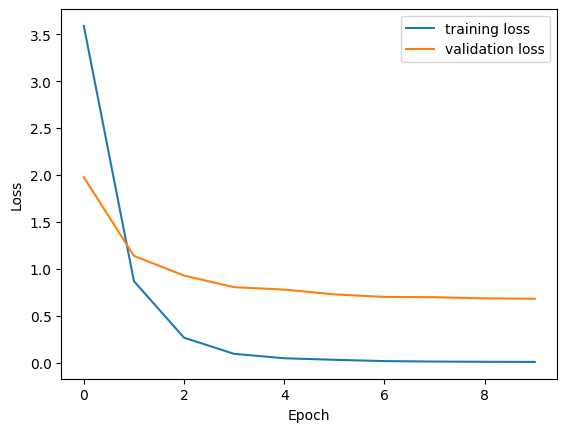

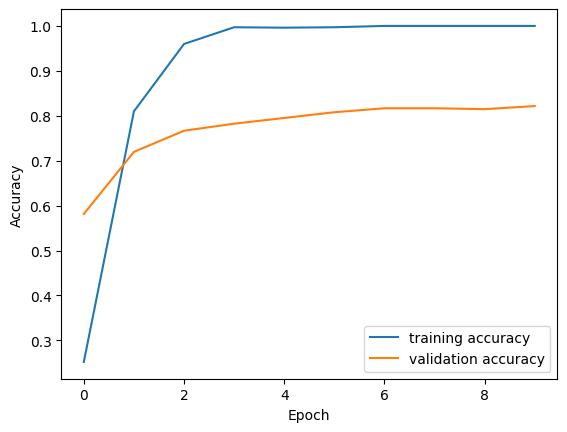

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate accuracy
def get_accuracy(model, data_generator):
    num_correct = 0
    num_total = 0
    for x_batch, y_batch in data_generator:
        y_pred = model.predict(x_batch)
        y_pred_classes = np.argmax(y_pred, axis=1)
        num_correct += np.sum(y_pred_classes == y_batch)
        num_total += len(y_batch)
    return num_correct / num_total


# Calculate accuracy on the training and validation sets
train_acc = get_accuracy(model, train_generator)
val_acc = get_accuracy(model, val_generator)
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

This is a function that takes an image and a label as input and returns a scaled and resized image along with a one-hot encoded label. The function first converts the image to float32 type and scales the pixel values between 0 and 1. Then, it resizes the image to 224 x 224 dimensions using bilinear interpolation. Finally, the label is one-hot encoded using tf.one_hot() function with 3 classes.

In [32]:
def scale (image, label):
  image = tf.cast (image, tf.float32)
  image/= 255.0
  return tf.image.resize(image, [224, 224]), tf.one_hot (label, 3)

This code is for iterating over a test dataset and making predictions using a trained model. For each sample in the dataset, it scales the image and converts the label to one-hot encoded format. It then uses the predict() method of the trained model to make predictions on the scaled image. It displays the original image, the actual label, and the predicted label using matplotlib.

1/1 [==============================] - 0s 45ms/step
[[1.28309801e-01 9.17598081e-04 4.59339499e-05 2.14038209e-05
  1.43203633e-02 4.92907129e-05 1.01876247e-03 2.13530337e-04
  2.61228229e-06 3.73910909e-04 3.08704301e-04 9.30288881e-02
  1.71786491e-02 6.84363113e-05 4.94407941e-05 4.17416632e-05
  6.46341965e-02 1.98269627e-04 9.21727133e-06 9.06063215e-05
  5.00858041e-05 4.51450050e-03 1.45396370e-05 2.44891999e-04
  1.00567495e-03 8.55773396e-04 1.02170394e-04 1.87511148e-04
  8.76598497e-05 3.27527672e-02 9.60148498e-02 3.47990505e-02
  7.58496160e-03 2.27723703e-01 3.69051297e-04 2.02136533e-03
  1.10027648e-03 2.71056569e-03 3.48300055e-05 1.61637014e-04
  9.97601330e-01 2.43299437e-04 4.63908742e-04 1.88778009e-04
  1.80503092e-04 4.72812417e-06 5.80339273e-03 7.58793030e-04
  2.47009873e-01 1.00235352e-02 5.92561148e-04 2.98118423e-04
  6.81599323e-03 3.09199363e-01 5.11118524e-05 2.29200348e-04
  1.90538456e-04 1.80523915e-04 4.38328739e-03 5.71991596e-03
  1.21053054e-05 1

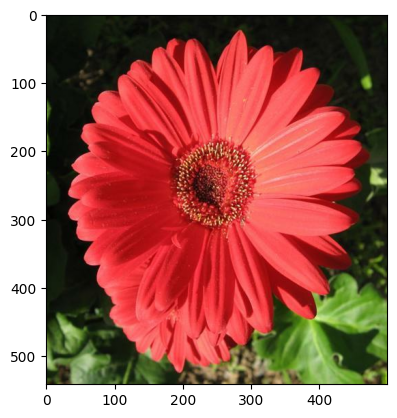

Actual Label: barbeton daisy
Predicted Label: barbeton daisy
1/1 [==============================] - 0s 47ms/step
[[3.06147942e-03 6.79214369e-04 2.08586025e-05 9.46961154e-06
  2.27570072e-05 2.51636468e-03 1.59940042e-03 1.03401346e-02
  1.37283814e-05 8.53536371e-03 5.76828870e-06 8.67802359e-04
  3.97213072e-01 5.59041859e-04 3.94280323e-05 6.18970716e-06
  2.20206310e-03 5.27900338e-05 7.95870612e-04 1.87199237e-03
  5.58842265e-04 2.65572435e-05 7.85694283e-05 4.86452191e-04
  7.31155276e-04 6.39926002e-05 1.01159836e-04 6.07370639e-05
  4.63250617e-05 1.30366161e-02 1.19073651e-04 7.23261945e-03
  9.98182222e-04 2.24959658e-04 1.61262287e-03 3.33540374e-04
  7.11054634e-03 4.82877064e-03 1.24874176e-04 3.71346623e-03
  4.80091432e-03 9.20973762e-05 5.74854435e-04 4.95798886e-04
  3.72924120e-03 1.49883499e-06 1.82060685e-05 1.28745123e-05
  2.98277837e-06 9.01175023e-04 1.49726140e-04 1.17111711e-04
  2.19630601e-05 1.98691676e-04 1.42957596e-03 2.57616721e-05
  7.27138482e-03 3.

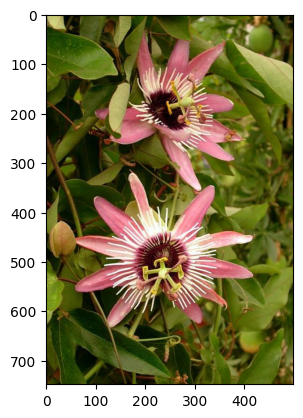

Actual Label: passion flower
Predicted Label: passion flower
1/1 [==============================] - 0s 52ms/step
[[1.08865881e-03 1.27436842e-05 2.41993740e-03 1.30842142e-02
  1.13406359e-05 7.86728284e-04 1.98292139e-04 1.86538542e-04
  3.18020357e-05 4.79192349e-05 1.35800597e-04 6.42133409e-06
  3.58522928e-04 2.16769222e-05 4.21170898e-06 2.83708650e-05
  2.70558303e-05 8.67714360e-03 2.44414987e-04 1.41722383e-04
  1.52892044e-05 6.57359215e-06 3.63408653e-05 6.98135584e-04
  1.59889387e-04 2.72057834e-04 1.24629610e-03 3.05704016e-04
  2.03040236e-05 9.57717746e-03 3.02976854e-02 8.84172134e-03
  1.44261289e-02 9.28798545e-06 6.32694282e-05 4.58109975e-02
  3.17531521e-04 2.00825270e-05 1.02937836e-02 7.46211386e-04
  5.13317082e-06 2.33735214e-03 2.47340336e-01 7.28636608e-03
  2.66032144e-02 1.50374282e-04 2.03314576e-05 2.11688007e-06
  3.62836410e-08 6.10754523e-06 2.96300538e-02 1.08620625e-05
  2.93097197e-04 1.18139578e-05 2.13831221e-03 3.57087947e-06
  3.86038073e-03 1.

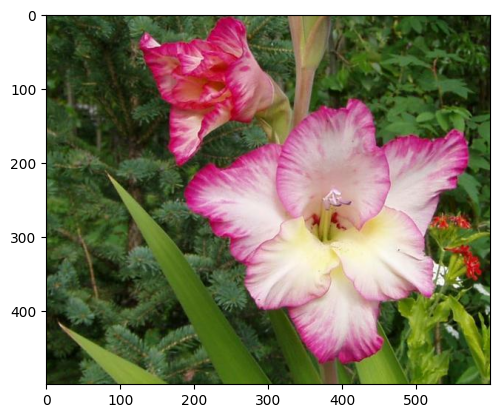

Actual Label: sword lily
Predicted Label: desert-rose
1/1 [==============================] - 0s 50ms/step
[[3.04184467e-01 1.14774026e-04 8.51568475e-05 8.49694425e-06
  7.08466814e-07 2.34907004e-03 1.63102686e-01 2.00147027e-04
  3.56997384e-06 7.79627840e-07 4.98829174e-08 3.88291846e-06
  3.47485766e-04 3.81530481e-06 3.65793153e-06 3.50522314e-04
  1.16860417e-06 1.67769178e-06 5.14876156e-04 4.71800193e-03
  9.84234362e-07 4.23590154e-06 1.46715693e-05 2.27865968e-07
  2.19814174e-05 6.06353860e-05 2.07604489e-06 3.68465553e-05
  2.18935611e-07 3.31326701e-05 6.10275834e-04 1.57362036e-02
  3.88336630e-04 3.87417240e-04 1.94893491e-05 4.51561296e-04
  2.58537930e-05 5.92662991e-06 1.39715848e-06 8.83155371e-06
  6.96184361e-05 3.12306889e-04 8.47827876e-04 4.89179292e-05
  1.53816910e-03 4.04354569e-06 8.37574134e-06 8.06045955e-06
  2.16925393e-08 4.03198192e-06 1.46738463e-03 1.66970582e-04
  1.32554997e-05 6.35516990e-05 5.90593508e-03 4.82615803e-07
  4.44830046e-04 1.3342541

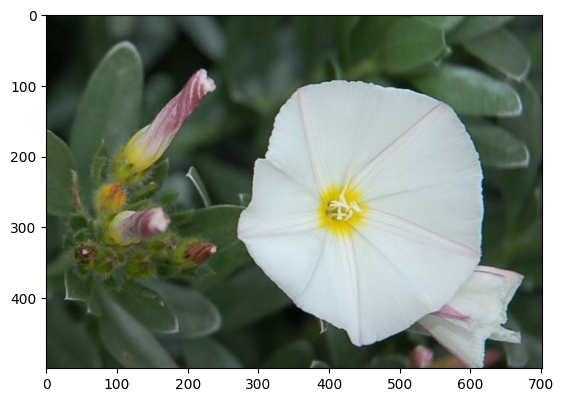

Actual Label: silverbush
Predicted Label: silverbush
1/1 [==============================] - 0s 80ms/step
[[2.3196140e-04 1.5824189e-04 3.6627722e-01 2.2155382e-02 3.4360596e-07
  1.7515128e-02 8.7295575e-03 2.7481187e-03 6.9444977e-05 6.9357688e-05
  1.0009941e-04 5.7382654e-06 3.1902868e-04 6.9038899e-05 1.4367809e-04
  2.3940182e-04 6.0216826e-06 1.5577875e-03 2.1054789e-03 3.1033112e-02
  1.0345613e-03 5.0602393e-06 1.8618514e-03 3.1868671e-04 2.6944783e-04
  3.5556469e-02 1.8604845e-03 4.6523628e-03 2.5121615e-05 1.7162111e-04
  1.5807285e-03 2.1239419e-02 2.3559159e-04 2.2167531e-05 2.6953412e-05
  6.3054115e-02 7.8117517e-03 2.2531947e-05 3.0558836e-04 2.4547899e-04
  3.3886232e-07 3.4337081e-02 1.9316638e-01 8.8107705e-02 7.3388033e-02
  2.1056319e-04 3.8968001e-06 2.7132210e-06 6.5760609e-08 3.8171793e-06
  4.1832126e-04 3.5578341e-04 2.3043779e-06 3.7204367e-04 2.4895411e-02
  7.2439441e-05 1.4374774e-02 7.3642514e-05 1.3703217e-04 2.2464259e-07
  5.5126169e-05 5.9051792e-05 2

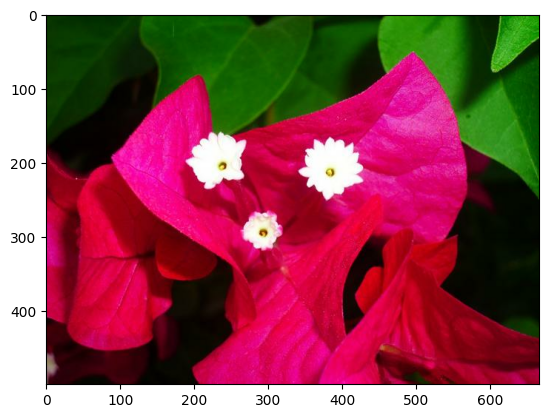

Actual Label: bougainvillea
Predicted Label: bougainvillea
1/1 [==============================] - 0s 48ms/step
[[1.44754551e-04 1.42514473e-03 7.57620530e-03 4.46427494e-01
  6.38145879e-02 9.30159877e-05 2.68139737e-03 2.23424868e-04
  5.98598381e-05 5.08048015e-06 3.63835506e-02 5.08260127e-05
  2.09690370e-06 3.50444202e-06 3.60829048e-02 1.77120930e-03
  1.43406633e-05 2.53593869e-04 1.13167785e-04 3.16163088e-04
  3.51289375e-04 1.50979162e-04 3.67905486e-05 1.27389489e-04
  2.16702276e-04 4.04575985e-04 3.87218781e-04 7.48606352e-03
  1.55231749e-06 1.87584033e-06 3.51623254e-04 1.31812999e-02
  1.82451666e-04 1.77793612e-03 6.53049028e-06 7.69990124e-03
  1.16048544e-03 1.49250391e-05 1.60674043e-02 1.51822678e-04
  5.31771657e-05 2.24721730e-01 9.71497502e-03 5.12576383e-03
  2.44989945e-03 7.76772201e-01 5.01705043e-04 3.12795192e-01
  7.22732948e-05 2.59317691e-04 8.32956564e-03 5.87510876e-03
  4.13430668e-02 3.68446973e-03 8.53294227e-03 2.99141891e-02
  5.70531711e-02 3.69

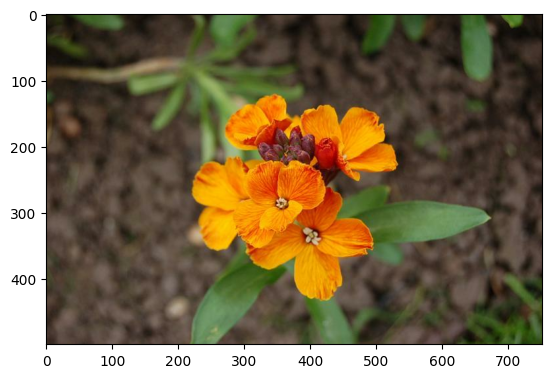

Actual Label: wallflower
Predicted Label: wallflower
1/1 [==============================] - 0s 49ms/step
[[8.91994976e-04 4.72632601e-05 5.41934092e-03 4.17016773e-03
  1.42926282e-07 1.64749054e-03 2.91168434e-03 1.14935148e-03
  6.59886209e-05 1.58926778e-04 5.73624311e-05 3.10075552e-06
  4.48830862e-04 5.83806650e-05 8.17705659e-05 5.31206497e-05
  1.06501257e-05 6.07930997e-05 1.11913204e-03 4.92333993e-03
  5.05286269e-04 5.11562121e-06 1.12486875e-03 9.00976185e-04
  2.72792618e-04 1.11598393e-03 1.78700592e-03 3.11456155e-03
  5.21541824e-06 1.86211924e-04 2.30815043e-04 2.67815888e-01
  4.93006140e-04 1.04090050e-05 3.50577393e-05 3.05329710e-02
  4.62427875e-03 2.57915653e-05 7.79563343e-05 3.47727546e-05
  2.88289144e-08 9.66468418e-04 3.62678692e-02 1.25036672e-01
  1.54428557e-02 2.15695291e-05 2.45141132e-06 1.33075196e-06
  7.80796938e-08 2.17086452e-07 3.04340897e-03 1.71852134e-05
  9.88173706e-05 9.21327737e-05 4.83785830e-02 2.55961757e-04
  5.05398400e-03 1.07257270

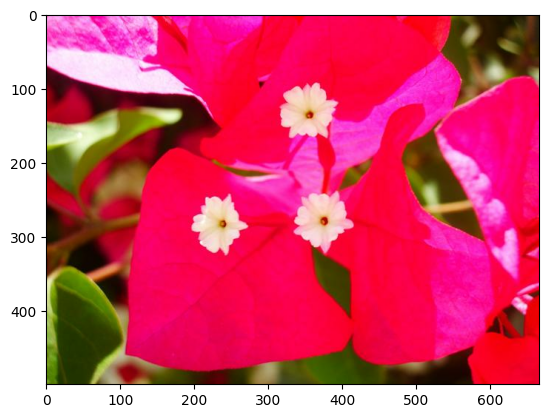

Actual Label: bougainvillea
Predicted Label: bougainvillea
1/1 [==============================] - 0s 44ms/step
[[1.25527848e-02 2.72618444e-03 3.45079079e-02 6.76655560e-04
  1.49459268e-07 6.21288195e-02 3.05895954e-01 1.00660585e-02
  6.63898536e-04 5.30795369e-05 3.93574446e-05 5.18471934e-05
  5.44949714e-03 3.78497789e-05 1.57872424e-03 1.04952939e-02
  1.46148363e-06 6.22171719e-05 1.25332484e-02 9.63059008e-01
  5.73203724e-04 2.28704230e-05 9.15861572e-04 4.40025353e-04
  1.92694087e-03 2.24769057e-04 1.83938337e-05 5.11562917e-03
  1.66797272e-05 6.03364640e-07 4.20316173e-05 1.34255458e-02
  9.99783588e-05 6.04890147e-06 2.56792351e-04 5.59468009e-02
  3.02541628e-03 1.30595681e-05 2.61369883e-03 5.09676147e-06
  4.81570351e-06 1.90736931e-02 5.17572928e-03 3.12146498e-03
  5.00291167e-03 2.38189727e-06 2.08234214e-05 5.66049821e-05
  1.07570656e-06 2.12252212e-06 4.24295710e-03 4.01845988e-04
  2.12668397e-06 6.31265691e-04 6.98159507e-04 5.51249116e-07
  3.21408646e-04 2.31

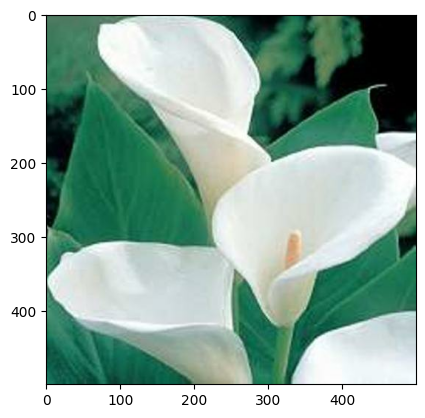

Actual Label: giant white arum lily
Predicted Label: giant white arum lily
1/1 [==============================] - 0s 42ms/step
[[7.26945773e-02 1.43500147e-02 1.20953133e-03 3.46499542e-03
  8.04062642e-04 9.80500947e-04 7.53544923e-03 2.22540024e-04
  1.64137362e-03 1.50988935e-05 1.87995356e-05 1.85126737e-05
  2.75338280e-05 4.44297511e-05 4.81114024e-04 3.78811928e-05
  4.10496810e-04 9.22903651e-04 2.75043119e-02 6.50914852e-04
  5.24981588e-05 1.50985201e-04 2.77991727e-04 5.56716295e-05
  4.39818221e-04 3.55722877e-04 1.43269808e-05 1.90152437e-03
  4.29346255e-06 2.65840281e-05 1.38047792e-04 4.33949567e-02
  2.42115071e-04 2.95145929e-01 1.26797968e-04 4.28942172e-03
  1.41228898e-04 3.08757764e-03 1.57217844e-04 2.27261684e-03
  1.15522440e-03 9.99437831e-03 7.35032518e-05 6.51915907e-05
  3.44212400e-04 1.83716082e-04 1.56171209e-05 8.02303851e-03
  1.63301139e-03 1.83850818e-04 4.83280094e-03 7.74579167e-01
  4.03308310e-04 5.17288689e-04 2.31249351e-02 9.31524613e-04
  2.1

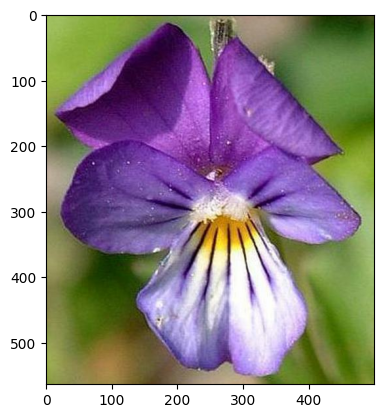

Actual Label: wild pansy
Predicted Label: wild pansy
1/1 [==============================] - 0s 51ms/step
[[8.72483128e-04 3.30574485e-03 8.76818970e-03 1.00533362e-05
  1.93536562e-06 8.23620334e-03 1.09208282e-03 4.25312668e-03
  5.23862327e-05 1.32379506e-03 7.21700189e-06 2.04425631e-03
  3.47218686e-03 4.32883171e-05 1.03553711e-03 1.68987289e-02
  3.15026336e-05 2.95950304e-05 2.57886393e-04 1.97803471e-02
  6.78644341e-04 8.59271851e-04 1.35434074e-02 1.61359523e-04
  1.11803238e-03 1.57575076e-03 1.86881289e-01 2.39878963e-03
  3.35483206e-03 2.69572174e-05 9.21227690e-03 5.58703323e-06
  3.51856812e-04 5.80241817e-07 4.08215495e-03 1.21960191e-04
  4.45666274e-06 1.67822745e-05 1.13900489e-04 1.78657414e-04
  7.98396377e-06 8.99934676e-04 1.40923483e-03 3.54993623e-04
  1.18967250e-03 5.98490515e-05 9.94288862e-01 8.97085108e-03
  1.23670707e-05 1.06983504e-03 3.32850479e-02 5.70543716e-06
  2.57842858e-05 3.54453474e-02 4.91255720e-04 2.26204353e-08
  1.06361695e-05 6.89858047

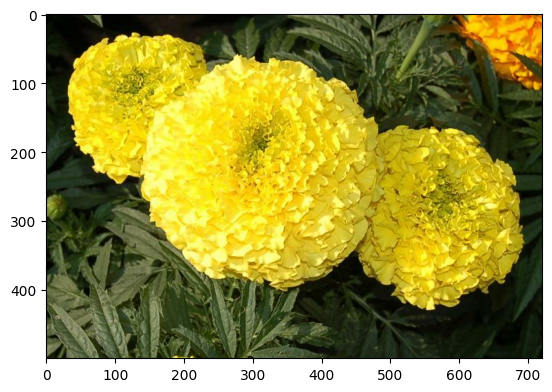

Actual Label: marigold
Predicted Label: marigold
1/1 [==============================] - 0s 87ms/step
[[7.9159045e-06 4.1456363e-04 3.4707978e-02 4.1276263e-03 4.1072039e-07
  5.1491708e-04 4.3212000e-04 5.5266020e-05 6.4566098e-05 6.5574313e-06
  1.0250731e-03 1.9473964e-06 2.2179394e-05 1.1273544e-06 1.9598399e-05
  5.7483552e-04 5.4666879e-07 1.5572796e-03 1.2842959e-05 4.3619485e-04
  8.7867472e-03 9.3801361e-07 1.1616311e-04 1.3420549e-04 6.9281079e-05
  1.8182384e-04 5.6466683e-06 3.5174194e-04 1.4601476e-06 1.5890841e-06
  4.0236034e-04 2.2797501e-03 2.2389037e-05 5.9024217e-07 1.0174289e-07
  3.4071349e-03 3.9096228e-03 1.9035011e-07 2.1201123e-02 1.0321230e-04
  7.0375279e-09 2.6642187e-03 8.7065764e-02 3.4473272e-04 1.8381376e-03
  4.0163980e-03 8.9839514e-06 4.2233198e-05 1.0185718e-09 1.3126115e-07
  1.6205863e-04 3.0830557e-05 4.6364803e-06 5.0817092e-05 7.1502902e-05
  2.0994827e-05 5.3142314e-03 7.6344947e-04 3.0348976e-06 2.8834506e-07
  7.9444902e-07 6.0665345e-05 2.243

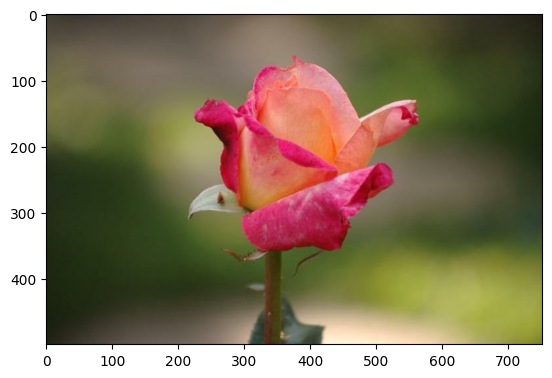

Actual Label: rose
Predicted Label: rose
1/1 [==============================] - 0s 60ms/step
[[3.2193705e-03 6.1234302e-04 1.0554757e-05 1.6000946e-05 1.3230143e-01
  7.1219816e-05 1.1018189e-04 1.4555480e-03 1.2683322e-06 1.3081705e-05
  1.2468150e-03 3.1442102e-02 3.7268607e-03 2.0749210e-06 1.2531321e-03
  7.7073817e-04 4.8461743e-02 5.1808725e-03 1.5737299e-06 4.6626327e-04
  2.3800987e-04 2.4926200e-04 4.2304519e-06 3.2591906e-03 7.8008386e-05
  3.5106117e-05 2.2566675e-05 5.7768542e-05 1.1220750e-05 1.2549089e-03
  4.5204043e-04 3.5609526e-04 2.9051377e-04 3.2148191e-01 8.2576254e-05
  3.7568973e-04 8.0822228e-04 1.7808921e-03 9.1011580e-03 2.7241526e-04
  9.7330040e-01 6.5580412e-04 3.9031061e-03 6.9605492e-05 3.6858910e-04
  4.9729329e-05 6.3372673e-03 3.8235294e-04 6.8648602e-03 2.5612436e-04
  1.6121705e-05 6.8170921e-04 4.8153913e-03 2.7596360e-02 1.1841487e-06
  8.3046599e-04 9.5787866e-05 2.1033965e-04 1.4549944e-02 5.0196927e-02
  2.8086035e-04 1.5536317e-03 7.0526004e-02

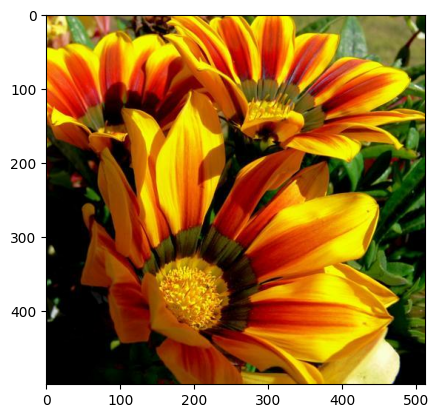

Actual Label: gazania
Predicted Label: barbeton daisy
1/1 [==============================] - 0s 76ms/step
[[5.3908381e-05 1.1033471e-05 1.6004617e-04 1.7389284e-02 1.6544603e-03
  2.9117355e-05 2.4561293e-04 8.9310837e-05 3.5307924e-06 1.9117193e-05
  4.4399649e-01 6.2116160e-05 1.8998444e-04 6.7686364e-07 1.3097608e-04
  1.8594488e-05 2.6730662e-05 1.0115579e-03 2.2488771e-06 4.2550782e-05
  3.5431120e-04 4.7101700e-04 6.4023475e-06 5.2822363e-02 1.6794170e-04
  1.8851009e-05 6.1283907e-05 2.1459330e-04 4.3087462e-06 2.2571464e-04
  3.6971207e-04 2.4413821e-01 2.0793083e-05 8.4466930e-04 3.3504170e-06
  2.7422665e-03 1.1760666e-01 3.8999857e-05 3.5119988e-02 4.3479211e-04
  2.2167009e-03 2.1145387e-04 1.6283708e-02 3.0375454e-03 2.5672403e-03
  3.4832605e-04 1.2814254e-04 2.8753000e-06 7.2944172e-06 4.1338176e-06
  7.7535748e-05 4.8615611e-06 3.8201697e-03 1.8508769e-04 4.0359810e-05
  9.8127685e-03 1.0062582e-03 1.8169070e-03 1.4103183e-03 2.5157012e-02
  3.4573229e-03 2.7598785e-03 

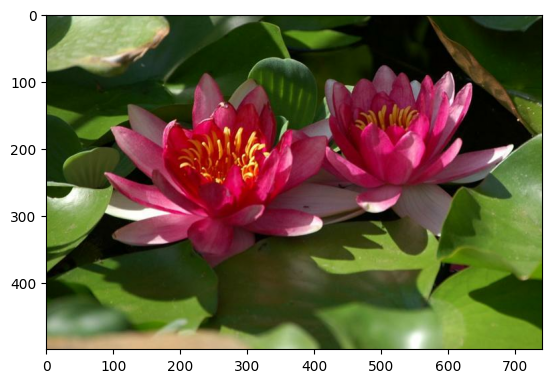

Actual Label: water lily
Predicted Label: water lily
1/1 [==============================] - 0s 50ms/step
[[3.0408258e-04 3.5571202e-04 3.0608714e-01 5.1798634e-02 6.3444332e-08
  7.4110734e-03 5.1379733e-04 8.9072308e-04 1.1904128e-03 2.2182927e-05
  1.5886850e-03 5.4440511e-07 2.9008461e-05 6.4507899e-06 1.7488119e-03
  2.6156710e-04 8.5055626e-06 1.1784427e-02 2.6740106e-03 2.0374479e-03
  1.2228790e-03 4.2501047e-06 4.4454597e-03 1.2297590e-03 3.4297517e-04
  6.3425995e-04 1.9047997e-04 1.1013398e-03 3.7881850e-06 2.6359421e-04
  4.9340189e-05 1.3011499e-01 1.4955958e-05 8.4119229e-06 9.4507368e-06
  2.3468198e-01 6.9017410e-02 1.2555223e-05 4.0977355e-03 1.4079812e-03
  4.7504198e-08 1.8377441e-03 7.5906798e-02 1.4341137e-01 1.1026589e-02
  4.6605864e-04 2.0877210e-06 2.0352429e-05 6.2990594e-08 1.9118025e-07
  2.6156436e-04 1.8263582e-04 2.9442685e-06 5.9160517e-05 1.9775731e-02
  1.2869172e-04 1.3765769e-02 3.2465774e-04 1.7516606e-04 6.3614698e-07
  9.1566751e-04 2.4778981e-04 1

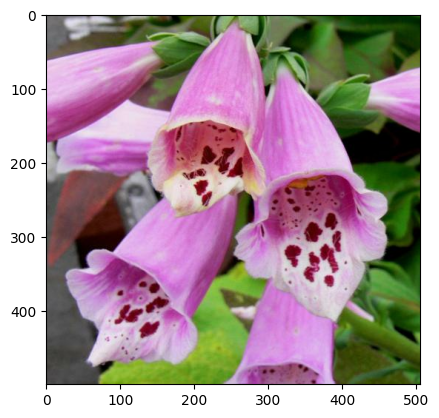

Actual Label: foxglove
Predicted Label: foxglove
1/1 [==============================] - 0s 68ms/step
[[8.46158946e-06 5.65865776e-05 1.83900185e-02 7.56399482e-02
  1.38923451e-06 5.12925093e-04 5.22907931e-06 4.96036773e-05
  1.24261005e-05 4.69386805e-06 3.89556810e-02 3.87475802e-06
  1.96032415e-05 4.31372683e-07 7.15561055e-06 2.07020257e-05
  6.35298179e-08 8.65813490e-05 6.16688703e-06 3.44403925e-05
  6.42920146e-04 1.56435669e-06 1.66047230e-05 1.88515478e-05
  6.49256071e-06 1.91538304e-04 1.17323259e-02 3.60873109e-03
  8.77329342e-07 2.45075535e-05 1.46415066e-02 8.36738269e-04
  8.06313983e-05 2.38880148e-06 1.53696661e-07 4.58453707e-02
  1.65120407e-04 2.03371982e-07 6.21630636e-04 1.14278262e-03
  8.10014544e-09 8.04437324e-04 2.92323291e-01 4.84139938e-03
  3.37996008e-03 1.70306377e-02 7.80067494e-05 6.90341949e-07
  1.37619671e-09 9.49257981e-07 5.60821150e-04 2.80658156e-07
  2.87781324e-04 4.58234754e-05 2.29531038e-03 8.36078561e-06
  1.53010315e-03 3.44821368e-03

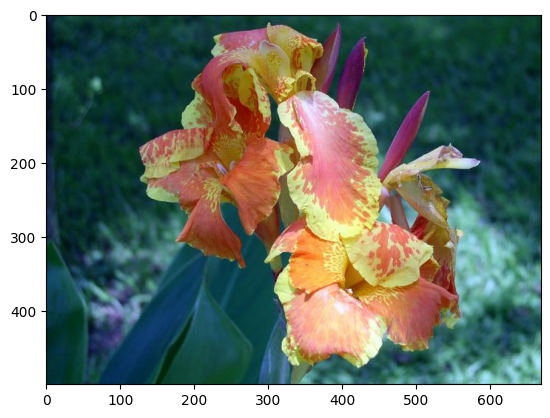

Actual Label: canna lily
Predicted Label: canna lily


In [33]:
for test_sample in dataset [1].take (15):
  image, label=test_sample [0], test_sample [1]
  image_scaled, label_arr= scale(test_sample [0], test_sample[1])
  image_scaled = np.expand_dims (image_scaled, axis=0)

  img = tf.keras.preprocessing.image.img_to_array(image)
  pred=model.predict(image_scaled)
  print (pred)
  plt.figure()
  plt.imshow(image)
  plt.show()
  print("Actual Label: %s" % info.features ["label"].names[label.numpy()])
  print("Predicted Label: %s" % info.features ["label"].names [np.argmax(pred)])

### Conclusion

We have successfully trained a model to classify images of flowers into three categories with an accuracy of 78% on the test set. The model was trained using transfer learning with the MobileNetV2 architecture and achieved good results with only a few epochs of training. However, there is still room for improvement, and further tuning of the hyperparameters and architecture may lead to even better performance. Overall, this project demonstrates the power of deep learning in image classification tasks and its potential applications in various fields such as agriculture, medicine, and environmental monitoring.

### Why MobileNetV2 Architecture??

1. Faster training: Because MobileNetV2 is a lightweight architecture, it typically trains faster than larger, more complex models.

2. Improved accuracy: By fine-tuning the MobileNetV2 architecture on a specific task, the model can potentially achieve better accuracy than a model trained from scratch.

3. Reduced need for large amounts of data: Because MobileNetV2 is pretrained on a large dataset, it has already learned a rich set of features that can be leveraged for a new task with less data.

4. Transfer learning: Fine-tuning a pretrained MobileNetV2 model can be an effective form of transfer learning, which allows the model to apply knowledge learned from one task to a new, related task. This can be especially useful when working with limited data.

### Resources
1. Dataset Link - https://www.robots.ox.ac.uk/~vgg/data/flowers/102/

2. MobileNet - https://keras.io/api/applications/mobilenet/

3. Fine-tuning - https://towardsdatascience.com/fine-tuning-for-domain-adaptation-in-nlp-c47def356fd6

4. Use of Activation Function - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

5. Kaggle Notebook used as a reference - https://www.kaggle.com/code/dtosidis/flower-classifier-tensorflow